# Goal of the project
- To find and explain the correlation between life expectancy and GDP of six countries 
- To explore and clean the dataset  

# Data
- The data is gathered from the World Health Organization and the World Bank
- stored as `add_csv.csv`

# Analysis 
In this project, I will try to perform both univariate analysis and bivariate analysis, answering the following questions:
- What is the average life expectancy of those six countries?
- What is the trend of average life expectancy?
- What is the trend of GDP of those countries? 
- What is the relationship between GDP and average life expectancy? Do people living in a developing country have lower life expectancy?
- What is the distribution of life expectancy?


In [4]:
# import the necessary library and load the data
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

In [70]:
# set the style 
sns.set_theme(style="whitegrid", palette="pastel", font_scale= .8)
sns.set_context("notebook")

In [5]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [6]:
# inspect the data type and missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### What is the average life expectancy of those six countries?

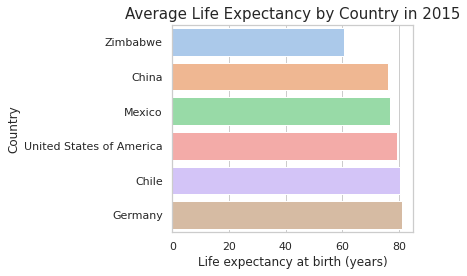

In [90]:
plt.clf()
ax = plt.subplot()
sns.barplot(
    data = df[df.Year == 2015].sort_values(by = "Life expectancy at birth (years)"),
    x = "Life expectancy at birth (years)",
    y = "Country"
)
ax.set_title("Average Life Expectancy by Country in 2015", fontsize = 15)
plt.tight_layout()
plt.show()

- On average, people in Zimbabwe have the least average life expectancy (60 yrs), following by China and Mexico (about 75 yrs)
- Can this phenomonen be attributed to GDP or economic status of one country?


#### What is the trend of average life expectancy?

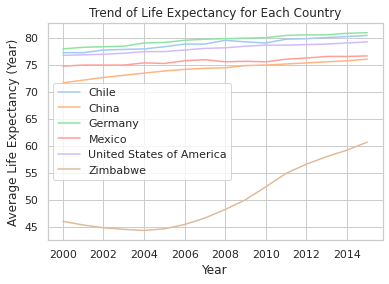

In [102]:
plt.clf()
countries = df.Country.unique()
for country in countries:
    country_df = df[df.Country == country]
    country_life_exp = country_df["Life expectancy at birth (years)"]
    plt.plot(country_df.Year, country_life_exp, label = country)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Year)")
plt.title("Trend of Life Expectancy for Each Country")
plt.legend()
plt.show()


- Generally the average life expectancy for people are increasing for each country
- Among all, we can see average life expectancy for people in Zimbabwe have significantly increased from 2004 to 2015
- Also, the difference of life expectancy between Zimbabwe and other countries are singificant, so the data basically are sperated  as two group - Zimbabwe versus Rest

#### What is the trend of GDP of those countries? 

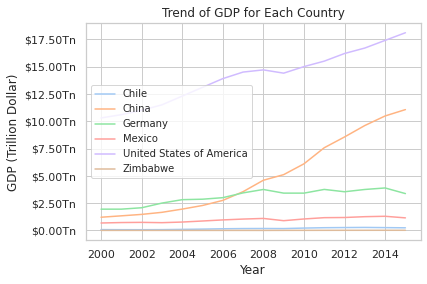

In [114]:
plt.clf()
ax = plt.subplot()
countries = df.Country.unique()
for country in countries:
    country_df = df[df.Country == country]
    country_gdp = country_df.GDP
    plt.plot(country_df.Year, country_gdp, label = country)
plt.xlabel("Year")
plt.ylabel("GDP (Trillion Dollar)")
plt.title("Trend of GDP for Each Country")
plt.legend(fontsize = 10, loc = "center left")

# How to format the y label?
from matplotlib.ticker import FuncFormatter
def trillion(y, pos):
    """
    Given the y value and its tick position,
    change the format of y value (in terms of trillion)
    """
    return f"${y*1e-12:.2f}Tn"
formatter = FuncFormatter(trillion)
ax.yaxis.set_major_formatter(formatter)

plt.show()


From the figure, we can see that,
- GDP of China and USA are growing rapidly in the recent year, but the growth of other countries are relatively small
- Generally, each country experience growth of GDP
- Zimabwe/ Chile/ Mexico are both developing countries (low GDP)
- While USA/ China/ Germany are developed countries (high GDP)

#### What is the relationship between GDP and average life expectancy? Do people living in a developing country have lower life expectancy?